### Importing Data

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("credit_score.csv")
df

,CUST_ID,INCOME,SAVINGS,DEBT,R_SAVINGS_INCOME,R_DEBT_INCOME,R_DEBT_SAVINGS,T_CLOTHING_12,T_CLOTHING_6,R_CLOTHING,...,R_EXPENDITURE_SAVINGS,R_EXPENDITURE_DEBT,CAT_GAMBLING,CAT_DEBT,CAT_CREDIT_CARD,CAT_MORTGAGE,CAT_SAVINGS_ACCOUNT,CAT_DEPENDENTS,CREDIT_SCORE,DEFAULT
0,C02COQEVYU,33269,0,532304,0.0000,16.0000,1.2000,1889,945,0.5003,...,0.0000,0.0625,High,1,0,0,0,0,444,1
1,C02OZKC0ZF,77158,91187,315648,1.1818,4.0909,3.4615,5818,111,0.0191,...,0.7692,0.2222,No,1,0,0,1,0,625,0
2,C03FHP2D0A,30917,21642,534864,0.7000,17.3000,24.7142,1157,860,0.7433,...,1.4286,0.0578,High,1,0,0,1,0,469,1
3,C03PVPPHOY,80657,64526,629125,0.8000,7.8000,9.7499,6857,3686,0.5376,...,1.2500,0.1282,High,1,0,0,1,0,559,0
4,C04J69MUX0,149971,1172498,2399531,7.8182,16.0000,2.0465,1978,322,0.1628,...,0.1163,0.0568,High,1,1,1,1,1,473,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,CZQHJC9HDH,328892,1465066,5501471,4.4546,16.7273,3.7551,16701,10132,0.6067,...,0.2041,0.0543,High,1,1,1,1,1,418,0
996,CZRA4MLB0P,81404,88805,680837,1.0909,8.3637,7.6667,5400,1936,0.3585,...,0.8333,0.1087,No,1,0,0,1,0,589,1
997,CZSOD1KVFX,0,42428,30760,3.2379,8.1889,0.7250,0,0,0.8779,...,0.2500,0.3448,No,1,0,0,1,0,499,0
998,CZWC76UAUT,36011,8002,604181,0.2222,16.7777,75.5037,1993,1271,0.6377,...,5.0002,0.0662,No,1,1,0,1,0,507,0


### DATA analysis and preprocessing

In [11]:
df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 87 entries, CUST_ID to DEFAULT
dtypes: float64(51), int64(34), object(2)
memory usage: 679.8+ KB


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  1000 non-null   object 
 1   INCOME                   1000 non-null   int64  
 2   SAVINGS                  1000 non-null   int64  
 3   DEBT                     1000 non-null   int64  
 4   R_SAVINGS_INCOME         1000 non-null   float64
 5   R_DEBT_INCOME            1000 non-null   float64
 6   R_DEBT_SAVINGS           1000 non-null   float64
 7   T_CLOTHING_12            1000 non-null   int64  
 8   T_CLOTHING_6             1000 non-null   int64  
 9   R_CLOTHING               1000 non-null   float64
 10  R_CLOTHING_INCOME        1000 non-null   float64
 11  R_CLOTHING_SAVINGS       1000 non-null   float64
 12  R_CLOTHING_DEBT          1000 non-null   float64
 13  T_EDUCATION_12           1000 non-null   int64  
 14  T_EDUCATION_6            

In [13]:
df = df.drop("DEFAULT", axis=1)

In [14]:
df["CAT_GAMBLING"].unique()

array(['High', 'No', 'Low'], dtype=object)

In [15]:
df["CAT_GAMBLING"] = df["CAT_GAMBLING"].map({"No": 0, "Low": 1, "High":2})
df["CAT_GAMBLING"]

0      2
1      0
2      2
3      2
4      2
      ..
995    2
996    0
997    0
998    0
999    0
Name: CAT_GAMBLING, Length: 1000, dtype: int64

In [16]:
df["CAT_GAMBLING"].unique()

array([2, 0, 1])

In [18]:
df = df.drop("CUST_ID", axis=1)

In [21]:
X = df.iloc[:,:-1]
X.shape

(1000, 84)

In [20]:
y = df.iloc[:, -1]
y.shape

(1000,)

In [104]:
df["CAT_GAMBLING"].unique()

array([2, 0, 1])

In [105]:
df.mean(numeric_only=True)

INCOME                 121610.019000
SAVINGS                413189.597000
DEBT                   790718.045000
R_SAVINGS_INCOME            4.063477
R_DEBT_INCOME               6.068449
                           ...      
CAT_CREDIT_CARD             0.236000
CAT_MORTGAGE                0.173000
CAT_SAVINGS_ACCOUNT         0.993000
CAT_DEPENDENTS              0.150000
CREDIT_SCORE              586.712000
Length: 85, dtype: float64

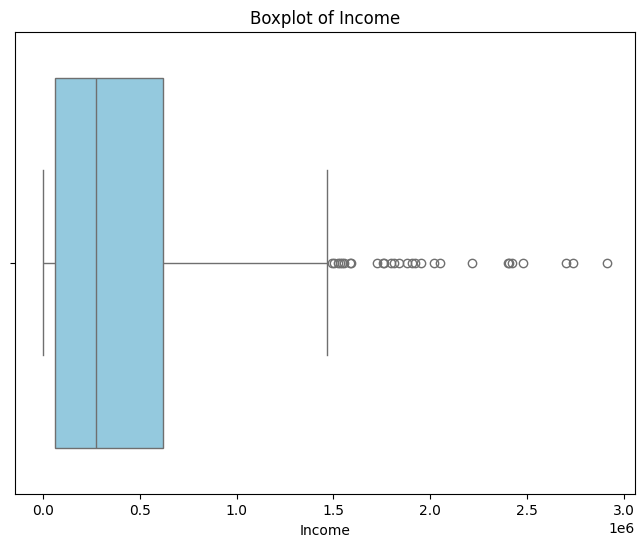

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['SAVINGS'], color='skyblue')
plt.title('Boxplot of Income')
plt.xlabel('Income')
plt.show()


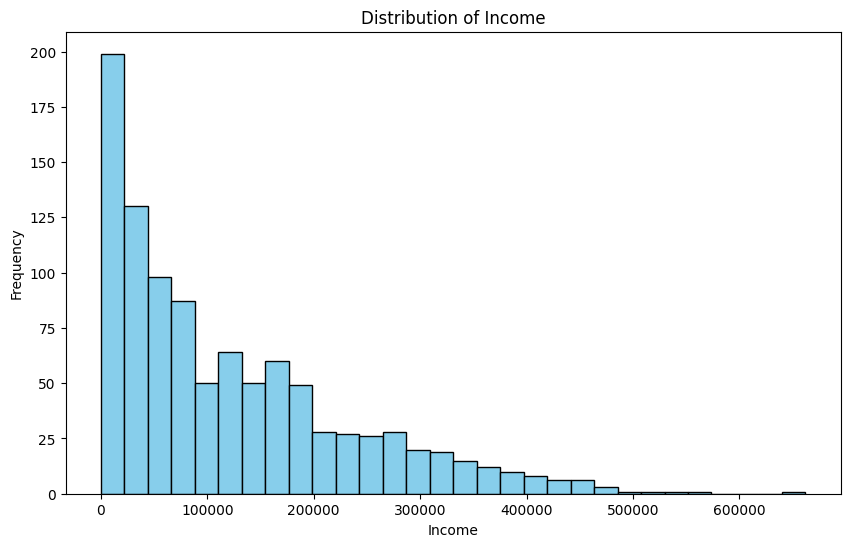

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['INCOME'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

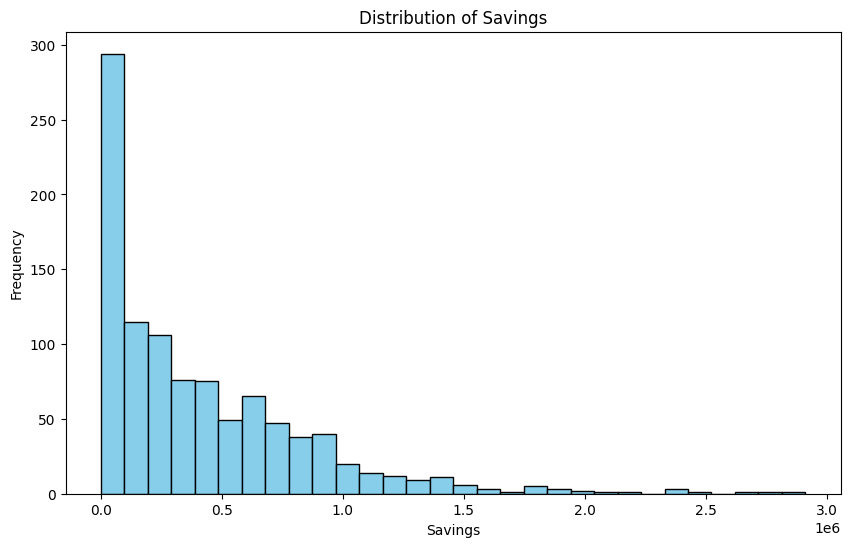

In [51]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['SAVINGS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Savings')
plt.xlabel('Savings')
plt.ylabel('Frequency')
plt.show()

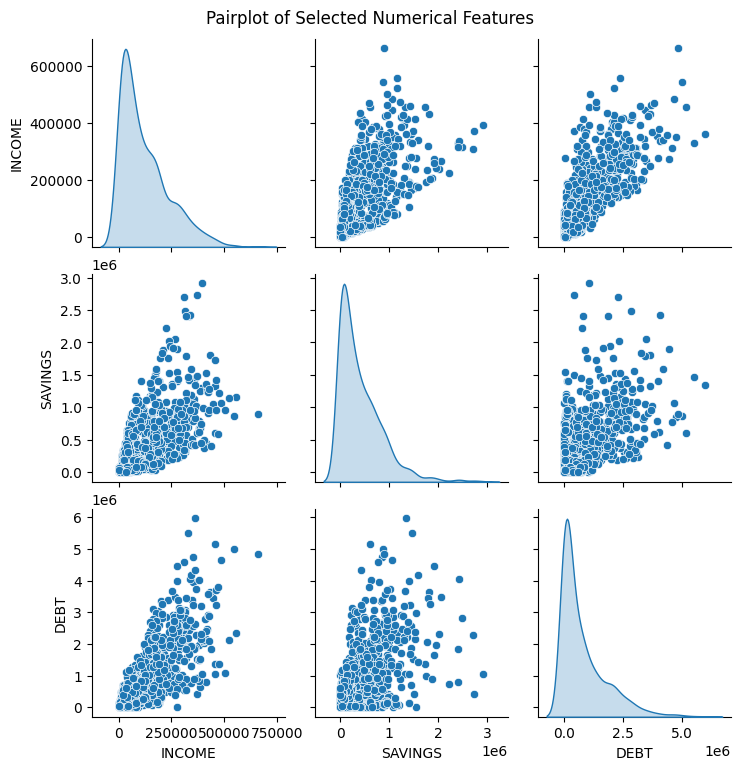

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['INCOME', 'SAVINGS', 'DEBT']

sns.pairplot(df[selected_features], diag_kind='kde')
plt.suptitle('Pairplot of Selected Numerical Features', y=1.02)
plt.show()


/tmp/ipykernel_6792/4189842318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_6792/4189842318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_6792/4189842318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='Set3')
/tmp/ipykernel_6792/4189842318.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `

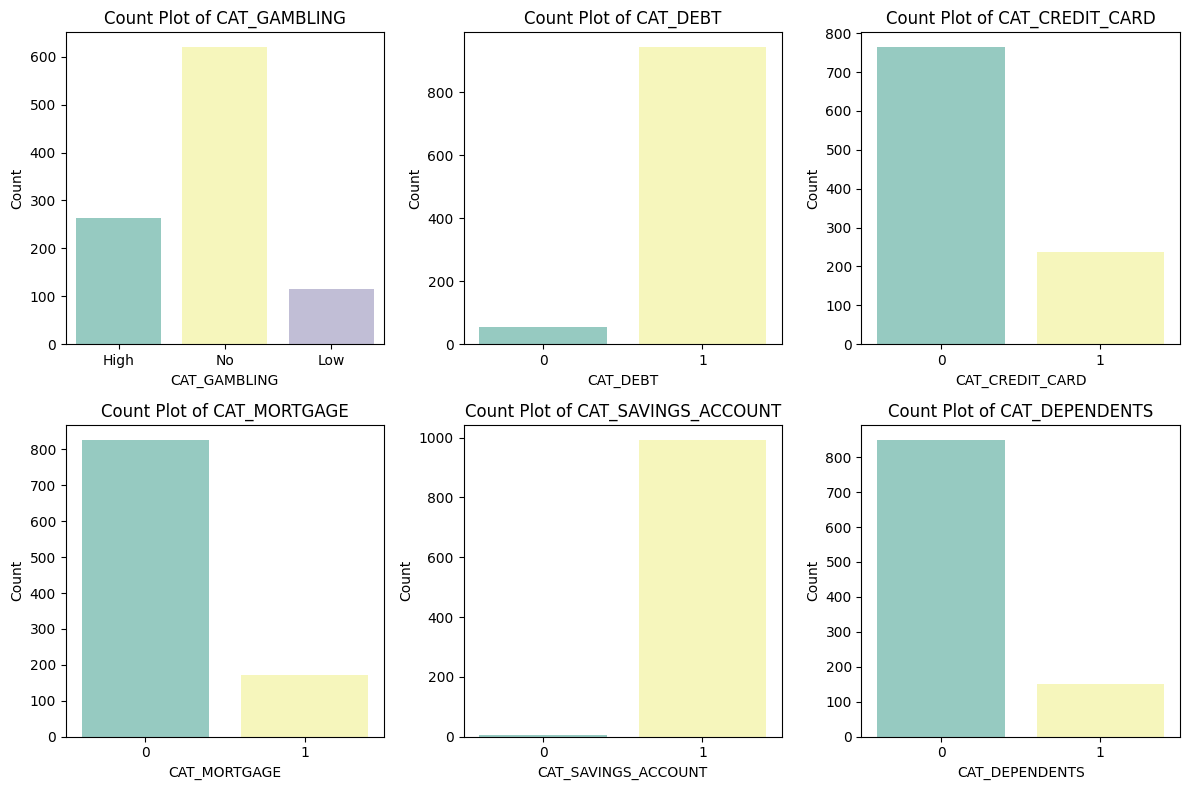

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_features = ['CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE', 'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, data=df, palette='Set3')
    plt.title(f'Count Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()
